# Question 1: Communities and Crime

In [497]:
# import statements
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, fbeta_score, make_scorer, classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from pandas.plotting import table
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import shap

## Task A: Dataset Curation and Preprocessing

### 1) Thoroughly examine the dataset. Familiarize yourselves with the 3 data origins. Be aware of potential limitations and/or biases. Discuss any potential shortcomings you may have detected.

The Communities & Crime dataset combines data from the FBI Uniform Crime Report, the 1990 U.S. Census, and the Law Enforcement Management and Administrative Statistics (LEMAS) Survey. Limitations include underreporting in crime data, outdated socioeconomic variables, and incomplete police department statistics. Potential biases stem from selection bias, systemic disparities in policing, and multicollinearity among features, which may distort analysis and model performance.

### 2) Implement and explain the preprocessing steps needed for this dataset, including handling missing values, outlier detection and treatment, and feature scaling (if necessary), among any additional preprocessing step you deem fit. Justify your choices.

In [7]:
#load data set
columns = [
    "state", "county", "community", "communityname", "fold", "population", "householdsize",
    "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp", "agePct12t21",
    "agePct12t29", "agePct16t24", "agePct65up", "numbUrban", "pctUrban", "medIncome",
    "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire",
    "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap",
    "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade",
    "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu",
    "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce",
    "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par",
    "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom",
    "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5",
    "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8",
    "PctRecImmig10", "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam",
    "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous",
    "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant",
    "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt",
    "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal",
    "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ", "MedRent", "MedRentPctHousInc",
    "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", 
    "PctForeignBorn", "PctBornSameState", "PctSameHouse85", "PctSameCity85",
    "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps",
    "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic",
    "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack",
    "PctPolicHisp", "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits",
    "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans",
    "PolicCars", "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy",
    "LemasPctOfficDrugUn", "PolicBudgPerPop", "ViolentCrimesPerPop"
]
crime_df = pd.read_csv('data/raw/communities.data', header = None, names = columns, na_values = '?')
crime_df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [8]:
#dropping columns with more than 50% of the data missing
crime_df.dropna(axis=1, thresh=int(0.5 * crime_df.shape[0]))

#identifying categorical and numeric columns
numeric_cols = crime_df.select_dtypes(include= ['number']).columns
categorical_cols = crime_df.select_dtypes(include=['object']).columns

#fill missing numeric values with the mean
crime_df[numeric_cols] = crime_df[numeric_cols].fillna(crime_df[numeric_cols].mean())

#fill missing categorical values with the mode
crime_df[categorical_cols] = crime_df[categorical_cols].fillna(crime_df[categorical_cols].mode().iloc[0])

crime_df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,58.826829,46188.336597,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,53,58.826829,46188.336597,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,24,58.826829,46188.336597,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,34,5.000000,81440.000000,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,42,95.000000,6096.000000,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


The steps taken in the preprocessing aim to handle missing data while minimizing bias. Dropping columns with more than 50% missing data ensures that only columns with sufficient information are retained, reducing the risk of including unreliable or irrelevant variables. For numeric columns, filling missing values with the mean is a common practice, but it does assume that the data is missing completely at random (MCAR) and that the mean represents a reasonable estimate. While this approach can be biased if the data is not MCAR, it provides a balanced approach to imputation when no better method is available. Similarly, imputing missing categorical values with the mode assumes that the most frequent category is the best replacement. While this could introduce bias if the missing data is not missing at random, it ensures that categorical variables are not left incomplete. Both methods are commonly used to address missing data

In [10]:
#outlier detection and treatment
#using Z-score to detect outliers and removing rows where Z > 3
z_scores = np.abs((crime_df[numeric_cols] - crime_df[numeric_cols].mean()) / crime_df[numeric_cols].std())
crime_df = crime_df[(z_scores < 3).all(axis=1)]

The Z-score method is used to identify outliers by standardizing each value in the dataset relative to the mean and standard deviation of its respective column. By calculating the absolute value of the Z-scores, we can determine how far away a data point is from the mean in terms of standard deviations. Typically, a Z-score greater than 3 (or less than -3) indicates that the data point is far from the mean and may be considered an outlier. Removing these outliers ensures that extreme values do not disproportionately influence the analysis or modeling, which could lead to biased or inaccurate results.

In [12]:
#remove communityname variable since there is already a community variable
crime_df.drop(columns=['communityname'], inplace=True)

The communityname variable is an irrelevant feature since there is already a community variable. Additionally, getting rid of this categorical variable makes the data more suitable for machine learning models which require numeric input

### 3) Perform feature engineering to create at least 3 new features and justify their potential impact on a regression model’s performance. (Feel free to create polynomials and/or interaction terms, as long as you justify your choices)

In [15]:
#creating a income inequality ratio, police coverage deficit, and economic hardship index features
new_features = pd.DataFrame({
    'IncomeInequalityRatio': crime_df['PctEmplProfServ'] / (crime_df['PctPopUnderPov'] + 1),
    'PoliceToIncomeRatio': crime_df['PolicPerPop'] / crime_df['medIncome'],
    'EconomicHardshipIndex': (crime_df['PctPopUnderPov'] + 
                              crime_df['PctUnemployed'] + 
                              crime_df['PctIlleg']) / 3
})

crime_df = pd.concat([crime_df, new_features], axis=1)

The newly engineered features aim to capture deeper insights into crime rates and socioeconomic conditions, which can enhance the predictive power of a regression model. IncomeInequalityRatio to capture economic disparities within a community. It measures the ratio of high-income households (represented by the percentage of people employed in professional or service occupations) to low-income households (represented by the percentage of people living under the poverty line). The +1 in the denominator prevents division by zero. PoliceToIncomeRation Reflects the relevant investment in law enforcement based on community income. EconomicHardshipIndex aggregates key socioeconomic indicators, such as poverty, unemployment, and single-parent households, into a single metric that reflects economic distress, which is often correlated with crime rates. By including these features, the model may better capture underlying patterns and improve its predictive accuracy.

In [17]:
# standardize numerical features 
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(crime_df)

# Convert the scaled data back to a DataFrame
crime_df_scaled = pd.DataFrame(scaled_data, columns=crime_df.columns)
crime_df_scaled

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,IncomeInequalityRatio,PoliceToIncomeRatio,EconomicHardshipIndex
0,-1.420429,0.310794,0.037312,-1.547791,4.858444,-0.971634,-0.581079,0.381995,0.112572,0.599924,...,-5.045534,-3.813790,9.604056,1.099440,3.734827,-4.133042,0.141179,0.048525,-0.852938,-0.354893
1,1.437993,0.310794,0.037312,-1.547791,-0.821592,-2.404197,-0.017970,-0.627322,2.876804,-0.146559,...,0.157901,0.164086,-0.077150,0.133873,-0.157562,0.122692,3.028246,-1.753752,-0.129869,-0.000679
2,-0.404101,0.310794,0.037312,-1.547791,-0.821592,-0.213218,2.065530,-1.762805,0.531395,-0.370505,...,0.157901,0.164086,-0.077150,0.133873,-0.157562,0.122692,1.553999,-0.888134,-0.081588,0.802208
3,0.739268,1.548650,-2.364854,-1.547791,-0.522643,0.882271,-0.581079,0.697407,-0.138722,-0.295856,...,0.157901,0.164086,-0.077150,0.133873,-0.157562,0.122692,-0.903080,0.161003,-0.680276,-1.205009
4,0.866309,-1.462734,-0.243593,-1.547791,-0.522643,-0.466024,-0.693700,0.886654,-0.390016,-0.519801,...,0.157901,0.164086,-0.077150,0.133873,-0.157562,0.122692,-0.903080,1.120199,-0.509222,-0.543808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,-1.865073,0.310794,0.037312,1.551545,-0.522643,-0.297487,2.403395,-1.699722,-0.808839,-0.669098,...,0.157901,0.164086,-0.077150,0.133873,-0.157562,0.122692,-0.227383,-1.783791,1.415133,0.920280
1005,-1.356909,-1.599615,1.496962,1.551545,0.673154,0.629466,-0.581079,0.823572,-0.557545,-0.519801,...,0.157901,0.164086,-0.077150,0.133873,-0.157562,0.122692,-0.964507,0.161003,-0.804143,-1.039709
1006,0.866309,-1.462734,-2.023094,1.551545,-0.522643,1.724955,-0.693700,1.012819,-0.808839,-0.594450,...,0.157901,0.164086,-0.077150,0.133873,-0.157562,0.122692,-0.841653,1.052073,-0.509222,-0.284051
1007,-1.166347,0.310794,0.037312,1.551545,-0.522643,-0.381755,-0.130592,0.192748,0.112572,0.525276,...,0.157901,0.164086,-0.077150,0.133873,-0.157562,0.122692,-0.534518,1.996705,-0.509222,-0.850794


In [18]:
#save as csv
crime_df_scaled.to_csv('data/preprocessed/preprocessed_crime_data.csv', index = False)

### 4) Curate the processed data to the best of your abilities. Include graphs, plots, and descriptive stats. Assume that your audience is highly technical and possesses domain knowledge.

In [20]:
#descriptive stats
crime_df.describe()

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,IncomeInequalityRatio,PoliceToIncomeRatio,EconomicHardshipIndex
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,...,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,30.361744,49.744669,45565.590507,5.494549,0.027483,0.445302,0.123191,0.839445,0.106561,0.089633,...,0.159975,0.075194,0.700194,0.432181,0.012953,0.193490,0.177017,0.338518,0.764493,0.250096
std,15.750755,29.236933,16698.350534,2.905287,0.033467,0.118727,0.177674,0.158602,0.119441,0.134028,...,0.019824,0.009233,0.020815,0.061716,0.082253,0.012949,0.162876,0.124110,0.484615,0.141227
min,1.000000,1.000000,70.000000,1.000000,0.000000,0.130000,0.000000,0.230000,0.000000,0.000000,...,0.010000,0.000000,0.540000,0.000000,0.000000,0.040000,0.000000,0.067901,0.178571,0.033333
25%,18.000000,25.000000,46188.336597,3.000000,0.010000,0.350000,0.020000,0.760000,0.030000,0.010000,...,0.163103,0.076708,0.698589,0.440439,0.000000,0.195078,0.060000,0.256637,0.434984,0.140000
50%,34.000000,58.826829,46188.336597,6.000000,0.020000,0.430000,0.050000,0.900000,0.060000,0.030000,...,0.163103,0.076708,0.698589,0.440439,0.000000,0.195078,0.120000,0.318519,0.621406,0.213333
75%,42.000000,58.826829,46188.336597,8.000000,0.040000,0.520000,0.150000,0.960000,0.120000,0.100000,...,0.163103,0.076708,0.698589,0.440439,0.000000,0.195078,0.230000,0.400000,0.945618,0.343333
max,56.000000,187.000000,93955.000000,10.000000,0.290000,0.920000,0.920000,1.000000,0.750000,0.820000,...,0.163103,0.076708,0.940000,0.500000,0.760000,0.250000,0.910000,0.886792,5.437304,0.786667


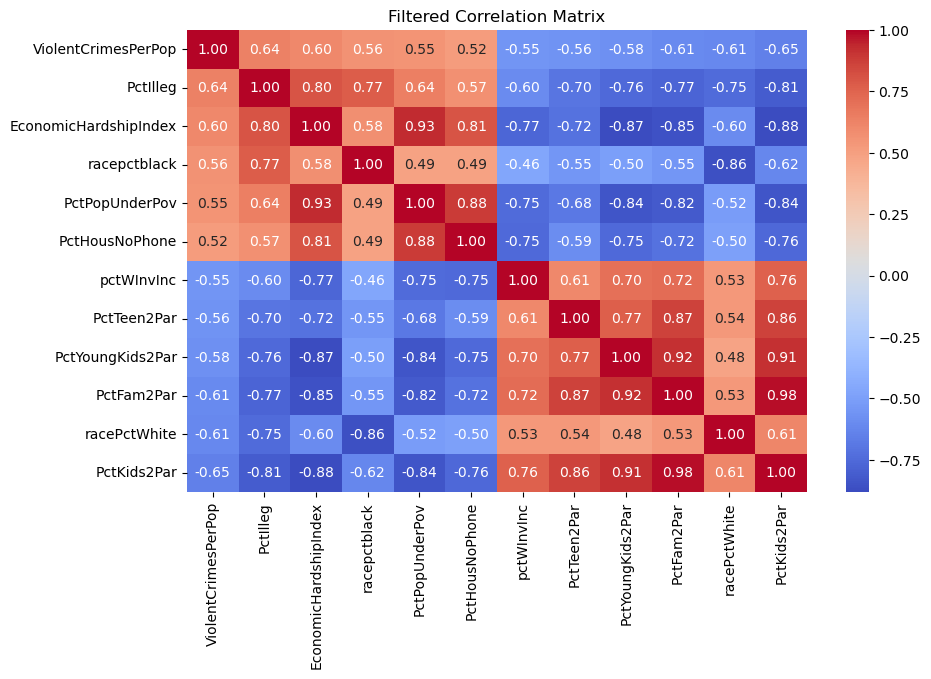

In [21]:
#correlation matrix
corr_matrix = crime_df.corr()

#get the correlation of each feature with the target variable
target_corr = corr_matrix['ViolentCrimesPerPop'].sort_values(ascending=False)

#filter out features with low correlation
relevant_features = target_corr[target_corr.abs() > 0.5].index.tolist()

#recompute the correlation matrix with only relevant features
filtered_corr_matrix = crime_df[relevant_features].corr()

#plot the filtered correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Filtered Correlation Matrix")
plt.savefig("confusion_matrix.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

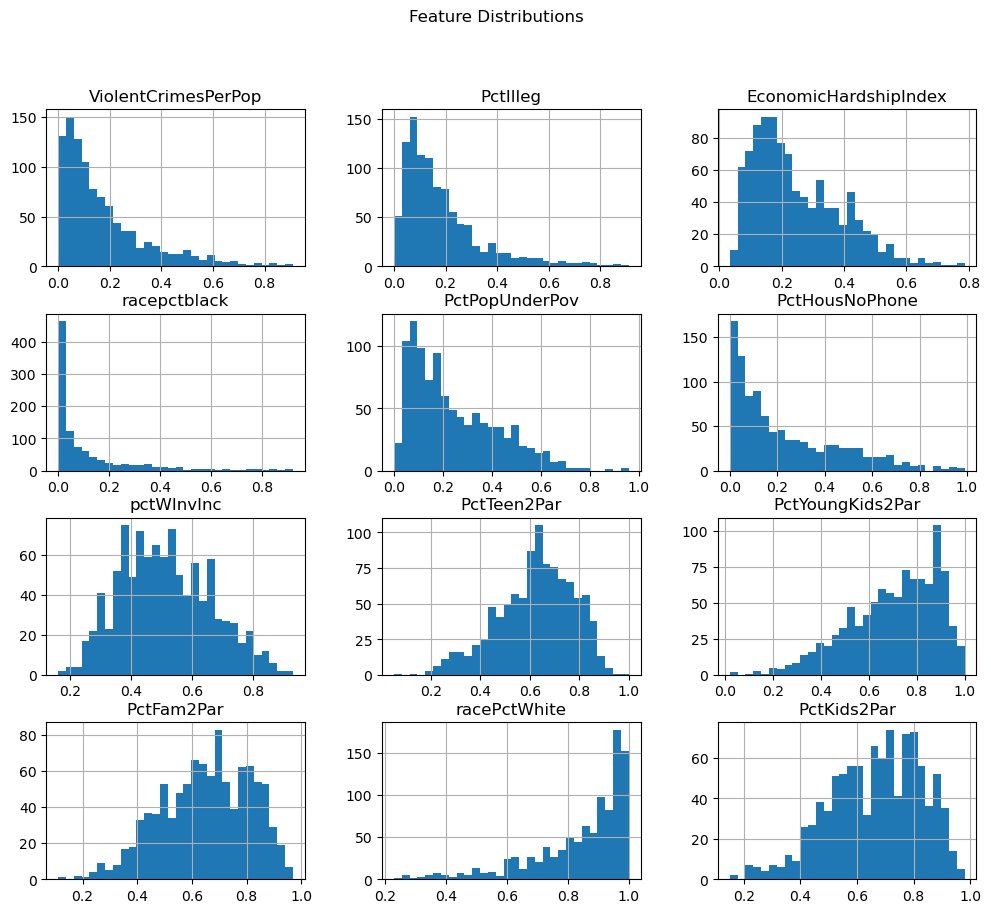

<Figure size 640x480 with 0 Axes>

In [22]:
#histograms
crime_df[relevant_features].hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()
plt.savefig("feature distributions.png", format="png", dpi=300, bbox_inches="tight")

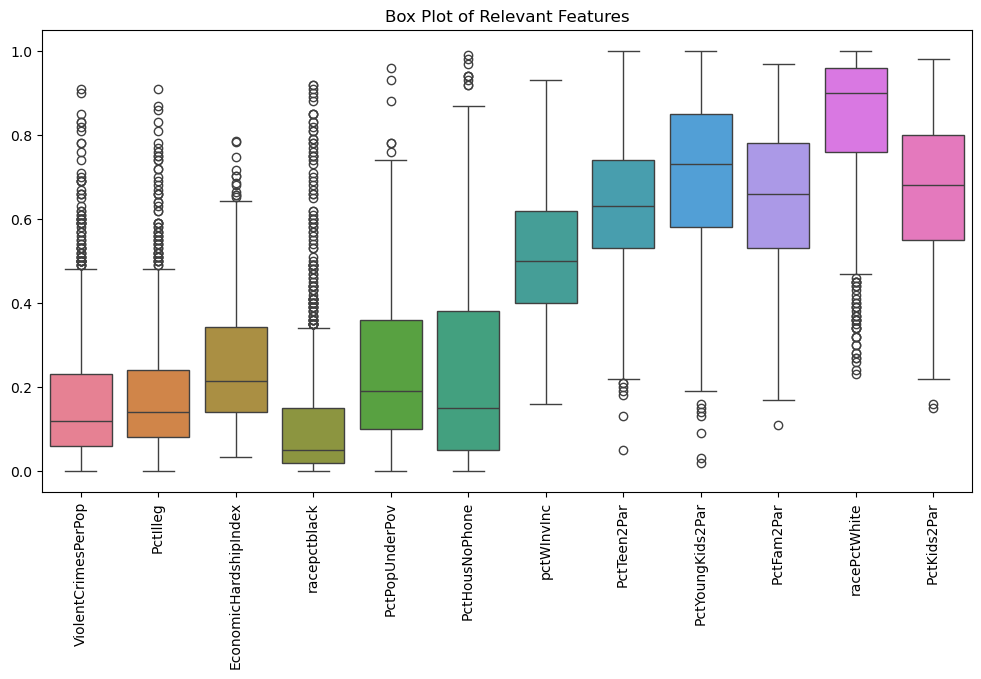

In [23]:
#boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=crime_df[relevant_features])
plt.xticks(rotation=90)
plt.title("Box Plot of Relevant Features")
plt.show()

## Task B: Regression Model Developement and Evaluation

### Regression Models and Hyperparameter Tuning

To predict ViolentCrimesPerPop we begin with a Linear regression model for initial exploration, but move to Ridge and Lasso to address overfitting by implementing regularization techniques.

#### Linear Regression

In [28]:
# Features variable (all but target)
X = crime_df.drop('ViolentCrimesPerPop', axis = 1)

# Target variable
y = crime_df['ViolentCrimesPerPop']

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the test data using the already fitted scaler
X_test_scaled = scaler.transform(X_test)
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

#Predict the target variable on the test set
y_pred = model.predict(X_test_scaled)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 1.078289165952182e+21
R-squared: -3.421990901375434e+22


The results indicate a very large MSE, suggesting that the model is performing very poorly. The negative R squared indicates that the model is misfitting the data severely due to issues such as multicollinearity and overfitting. We now explore Ridge and Lasso regression techniques to address the issue of overfitting and optimize our models.

#### Lasso

In [31]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model
lasso = Lasso(alpha=0.1) 

# Train the Lasso model on the scaled training data
lasso.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.031978053060203335
R-squared: -0.014835445546611536


#### Tuning Lasso with Cross Validation

In [33]:
# Define a range of alpha values to test
param_grid = {'alpha': np.logspace(-4, 4, 50)}

# Perform GridSearchCV to find the best alpha value
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Print the best alpha and corresponding performance
print("Best alpha:", grid_search.best_params_['alpha'])
best_lasso = grid_search.best_estimator_

# Predict with the best model
y_pred = best_lasso.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.552e-02, tolerance: 1.391e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.408e-03, tolerance: 1.381e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.626e-03, toler

Best alpha: 0.009102981779915217
Mean Squared Error: 0.014151456973300858
R-squared: 0.5508982327474392


With initial alpha=0.1, the MSE is 0.032 suggests that the model's predictions are not accurate and there is still some error. Further, the negative R squared indicates that the model is very poor at explaining the variability in the target variable. We tune the alpha value using grid search for a better outcome. After tuning alpha to = 0.009, our MSE improves to 0.014 while our R squared increases substantially to 0.55, suggesting that the model is better at explaining variance in the target variable with the new alpha value.

The alpha parameter controls regularization strength and the tuning reveals that a slightly stronger regulartization with a smaller alpha helps reduce overfitting.



#### Ridge

In [36]:
from sklearn.linear_model import Ridge

# Initialize the Ridge model
ridge = Ridge(alpha=1.0) 

# Train the Ridge model on the scaled training data
ridge.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.01915710550335064
R-squared: 0.39204210893404934


#### Tuning Ridge with Cross Validation

In [38]:
# Define a range of alpha values to test
param_grid = {'alpha': np.logspace(-4, 4, 50)}

# Perform GridSearchCV to find the best alpha value
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Print the best alpha and corresponding performance
print("Best alpha:", grid_search.best_params_['alpha'])
best_ridge = grid_search.best_estimator_

# Predict with the best model
y_pred = best_ridge.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Best alpha: 494.1713361323828
Mean Squared Error: 0.014031147031348749
R-squared: 0.5547163136454474


When alpha = 0.1, the MSE suggests that the predictions are relatively off from actual values and that the model is not regularizing enough and is overfitting values. The R squared is also low indicating that this model is only moderatly effective at capturing relationships in the data.

After tuning with the best alpha, we find that alpha = 494.171 is the optimal value, meaning regularization is very strong, forcing the model to shrink coefficients more significantly to prevent overfitting by penalizing large coefficients. The MSE is smaller than that of the previous Ridge model as well as the optimized Lasso model above. The R squared value also improved from the first Ridge model.

The Ridge model using the best alpha yields the best results overall, with a low MSE and high R-squared compared to the linear regression and lasso models.

### Classification Models and Hyperparameter Tuning

In [41]:
# summary statistics for target column 
crime_df['ViolentCrimesPerPop'].describe()

count    1009.000000
mean        0.177017
std         0.162876
min         0.000000
25%         0.060000
50%         0.120000
75%         0.230000
max         0.910000
Name: ViolentCrimesPerPop, dtype: float64

We will first discreticize the target variable ViolentCrimesPerPop to convert it into a categorical variable suitable for a classification task. To convert it into a binary classification problem, we need to set a threshold. The idea behind this process is to create an algorithm to predict communities with significant crime rates. An algorithm that is able to identify communities at high risk for crime could be used in a variety of policy contexts, including knowing where to increase police presence or have other targeted interventions in specific communities.

For the binary variable, we will create an indicator for whether the ViolentCrimesPerPop falls above a threshold. This threshold will be the 75th percentile of ViolentCrimesPerPop in the dataset. This allows us to separate out the communities with high levels of crime.

#### Discretization & Splitting Data

In [44]:
# set threshold 
threshold = crime_df['ViolentCrimesPerPop'].quantile(0.75)

# create target variable 
crime_df['target'] = (crime_df['ViolentCrimesPerPop'] > threshold).astype(int)

In [45]:
crime_df['target'].value_counts()

target
0    759
1    250
Name: count, dtype: int64

In [46]:
crime_df = crime_df.drop('ViolentCrimesPerPop', axis = 1)

In [47]:
# split data
X = crime_df.drop('target', axis=1)
y = crime_df['target']

#### Evaluation Metrics
Given the class imbalance, where high-crime communities (target=1) are less frequent, maximizing F1-score ensures a balance between precision and recall. This is critical in identifying high-crime communities without over-predicting or under-detecting them.

#### Initial Model Selection and Comparison
Logistic regression: A linear model that predicts probabilities and applies a threshold to classify observations. Used as a baseline model.

CART: A decision tree algorithm that uses Gini Impurity or Information Gain to split the data. It is simple to interpret but prone to overfitting.

C5.0/Random Forest: An advanced decision tree model that improves upon CART by reducing bias, handling noise, and offering boosted accuracy. It is often used for large datasets with high-dimensional data. Since there is no C5 through sklearn, we will use Random Forest as an alternative.

KNN: A non-parametric method that classifies based on the majority vote of nearest data points

In [50]:
# stratified train/test split (without validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=7)

In [51]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Only transform the test data using the already fitted scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [52]:
# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=7)
cart = DecisionTreeClassifier(random_state=7, criterion='gini')
rf = RandomForestClassifier(random_state=7)
knn = KNeighborsClassifier()
xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                              scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

In [53]:
# Fit initial models without tuning
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=7)

In [54]:
cart.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=7)

In [55]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=7)

In [56]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [57]:
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
# Evaluate models on test set
models = {'Logistic Regression': log_reg, 'CART': cart, 'Random Forest': rf, 'KNN': knn, 'XGB': xgb_model}
initial_results = {}

In [59]:
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    initial_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }

In [60]:
# Display initial results
print("Initial Model Performance without Tuning:")
for model, metrics in initial_results.items():
    print(f"{model}: {metrics}")

Initial Model Performance without Tuning:
Logistic Regression: {'accuracy': 0.8250825082508251, 'precision': 0.6527777777777778, 'recall': 0.6266666666666667, 'f1_score': 0.6394557823129252, 'roc_auc': 0.5}
CART: {'accuracy': 0.8151815181518152, 'precision': 0.620253164556962, 'recall': 0.6533333333333333, 'f1_score': 0.6363636363636364, 'roc_auc': 0.5}
Random Forest: {'accuracy': 0.8514851485148515, 'precision': 0.7272727272727273, 'recall': 0.64, 'f1_score': 0.6808510638297872, 'roc_auc': 0.8435087719298245}
KNN: {'accuracy': 0.8415841584158416, 'precision': 0.7142857142857143, 'recall': 0.6, 'f1_score': 0.6521739130434783, 'roc_auc': 0.5}
XGB: {'accuracy': 0.8316831683168316, 'precision': 0.65, 'recall': 0.6933333333333334, 'f1_score': 0.6709677419354839, 'roc_auc': 0.8436842105263159}


In [61]:
results_df = pd.DataFrame(initial_results).T  # Transpose to have models as rows

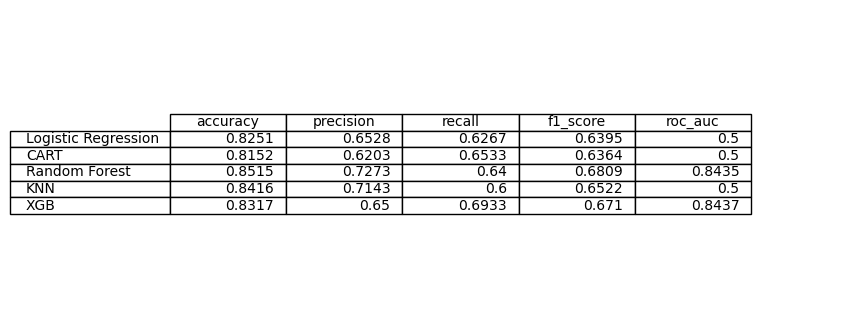

In [62]:
# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the size as needed

# Hide the axis
ax.axis('off')

# Create the table and add it to the plot
table(ax, results_df.round(4), loc='center', colWidths=[0.15] * len(results_df.columns))

# Save the figure as a PNG image
plt.savefig("figures/classification1_initial_performance.png", bbox_inches='tight', dpi=300)

In [63]:
# Identify the best model based on F1-score without tuning
best_initial_model = max(initial_results.items(), key=lambda x: x[1]['f1_score'])[0]
print(f"Best initial model without tuning: {best_initial_model}")

Best initial model without tuning: Random Forest


Given the good initial performance of the random forest, we would choose it as the best model based on the combination of high accuracy, precision, and recall.

#### Hyperparameter Tuning of Random Forest Model

In [66]:
# Now perform hyperparameter tuning using a validation set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=7)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=7)

In [67]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Only transform the test data using the already fitted scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)

In [68]:
# Hyperparameter tuning
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]}

In [69]:
rf = RandomForestClassifier(random_state=7)

In [70]:
best_models = {}

def tune_and_evaluate(model, param_grid, X_train, y_train, X_val, y_val):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_val_scaled)
    
    metrics = {
        'accuracy': accuracy_score(y_val, y_pred),
        'precision': precision_score(y_val, y_pred),
        'recall': recall_score(y_val, y_pred),
        'f1_score': f1_score(y_val, y_pred),
        'roc_auc': roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1] if hasattr(best_model, 'predict_proba') else y_pred)
    }
    
    return best_model, metrics

In [71]:
# Fit and tune random forest
best_models['Random Forest'] = tune_and_evaluate(rf, param_grid_rf, X_train_scaled, y_train, X_val_scaled, y_val)

In [72]:
# Create a DataFrame to store model performance
model_performance = []

# Compare performance of all models
for model_name, (best_model, model_info) in best_models.items():
    model_performance.append({
        'Model': model_name,
        'Accuracy': model_info['accuracy'],
        'Precision': model_info['precision'],
        'Recall': model_info['recall'],
        'F1-Score': model_info['f1_score'],
        'ROC AUC': model_info['roc_auc']
    })

# Convert to DataFrame
model_performance_df = pd.DataFrame(model_performance)

# Select the best model based on F1-score
best_model_name, (final_model, _) = max(best_models.items(), key=lambda x: x[1][1]['f1_score'])

# Evaluate the final model on test data
y_test_pred = final_model.predict(X_test_scaled)
test_metrics = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1-Score': f1_score(y_test, y_test_pred),
    'ROC AUC': roc_auc_score(y_test, final_model.predict_proba(X_test_scaled)[:, 1] if hasattr(final_model, 'predict_proba') else y_test_pred)
}

# Convert the final model evaluation to a DataFrame
test_metrics_df = pd.DataFrame([test_metrics])

# Output the DataFrame with model performance and final model evaluation
model_performance_df, test_metrics_df

(           Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
 0  Random Forest  0.860927       0.75  0.648649  0.695652  0.900782,
    Accuracy  Precision    Recall  F1-Score   ROC AUC
 0  0.842105   0.694444  0.657895  0.675676  0.875808)

In [73]:
model_performance_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Random Forest,0.860927,0.75,0.648649,0.695652,0.900782


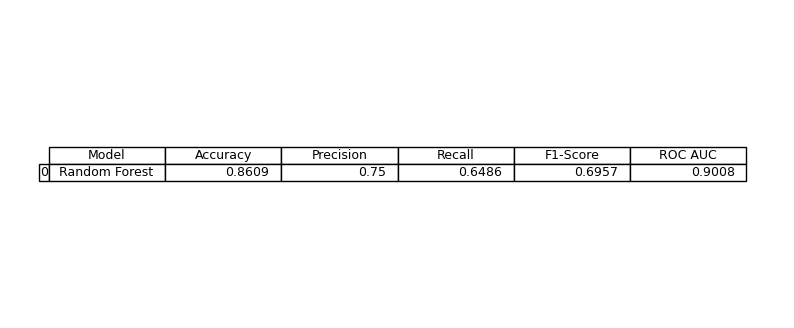

In [74]:
# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the size as needed

# Hide the axis
ax.axis('off')

# Create the table and add it to the plot
table(ax, model_performance_df.round(4), loc='center', colWidths=[0.15] * len(model_performance_df.columns))

# Save the figure as a PNG image
plt.savefig("figures/classification1_model_performance.png", bbox_inches='tight', dpi=300)

In [75]:
print(f"Final Model Test Performance ({best_model_name}):", test_metrics)

Final Model Test Performance (Random Forest): {'Accuracy': 0.8421052631578947, 'Precision': 0.6944444444444444, 'Recall': 0.6578947368421053, 'F1-Score': 0.6756756756756757, 'ROC AUC': 0.8758079409048936}


**Tuning Process**

Hyperparameter tuning was performed for the model to optimize its performance based on cross-validation. The goal of hyperparameter tuning was to improve key performance metrics (such as F1 score, recall, precision, and ROC AUC) by selecting the best combination of hyperparameters for each model. For Random Forest, hyperparameter tuning resulted in a significant improvement, increasing its accuracy from 85.1% to 86.1%, precision from 72.7% to 75.0%, recall from 64.0% to 64.9%, F1 score from 68.1% to 69.7%, and ROC AUC from 84.4% to 90.1%. This improvement highlights the model’s ability to better capture both positive and negative classes with higher discriminative power after tuning.

**Overall Model Performance**

Random Forest: Post-Tuning Performance: The best model after tuning was Random Forest, with an accuracy of 86.1%, precision of 75.0%, recall of 64.9%, F1 score of 69.7%, and ROC AUC of 90.1%. These results suggest that Random Forest offers the best balance between precision, recall, and accuracy, with excellent discriminative ability.

Final Test Performance: When evaluated on the test set, Random Forest achieved an accuracy of 84.2%, with an F1 score of 0.676 and a ROC AUC of 0.884. This strong performance on the test set confirms the model’s effectiveness and robustness across both training and unseen data.

**Conclusion**:

Based on the hyperparameter tuning and evaluation, Random Forest is the best-performing classifier, both in terms of training performance and final test performance. It provided the highest accuracy, precision, recall, F1 score, and ROC AUC after tuning.

### Picking between Regression and Classification

Out of the regression and classification model we chose Ridge regression. Ridge regression is preferred over random forest classification in this case because we are dealing with a continuous target variable rather than a categorical one, making regression models more appropriate. Additionally, ridge regression helps address multicollinearity among predictors by applying L2 regularization, which prevents overfitting and improves generalization, particularly when dealing with highly correlated features. While random forest can capture complex, nonlinear relationships, it may not always be the best choice for interpretability and handling small-to-moderate datasets with collinear predictors. Ridge regression provides a more stable and efficient solution, especially when the primary goal is to understand the relationships between variables rather than just maximizing predictive accuracy.

## Task C: Methodological & Substantive Implications

### 1) Now that the training and evaluation phase is complete, discuss the challenges you encountered during the first two Tasks. Are you overall satisfied with your final product? Justify your answer.

One of the main challenges faced during the preprocessing phase was how to handle missing values. By choosing to impute missing values, we introduced potential biases for the sake of not losing information. Outlier removal required balancing between improving model accuracy and retaining essential data. Additionally, feature engineering involved assumptions about socioeconomic factors that might not fully capture reality.

Furthermore, the regression models performed poorly, specifically linear regression and pre-tuned Lasso/Ridge models. After tuning, these models performed better but there is still some error and the R-squared was only slightly large (around 55%), indicating that the best regression model (Ridge, alpha = 494.17) is only moderately effective at capturing relationships in the data.

For the classification models, it was difficult to descretize the variable - implementation would lead to information loss regardless. The resulting models are only able to predict an indication, but does not provide much information on relative crime rates or other important factors.

Overall, the final models moderately predict crime rates, but limitations in data availability, potential biases, and challenges with tasks like discretization affect their reliability.

### 2) What are some key advantages and disadvantages of your approach?

**Advantages**: The model exploration between both regression and classification examines different methods. Some models incorporate meaningful socioeconomic factors, enhancing interpretability. Feature engineering improves predictive power by capturing economic and policing dynamics. Outlier removal prevents extreme values from distorting results.

**Disadvantages**: Assumptions in imputation and feature creation introduce potential biases. The model may not generalize well across different geographic regions or changing social conditions. Data limitations impact robustness and fairness. Model performance is fair but might require further evaluation.

### 3) If you had the resources, how would you modify this study to the current sociopolitical environment?

The study could integrate real-time economic indicators, updated crime reports, and policy changes to better reflect the evolving sociopolitical climate. Expanding the dataset to include different communities and demographic trends would improve model generalization and fairness.

### 4) How would you deploy or implement your model(s)? Any reservations or words of caution regarding deployment? How should your model(s) be used in the context of your analysis?

The models could be implemented for city planning, law enforcement resource allocation, and social policy assessments. However, there are risks of misinterpretation and unintended policy consequences. The models should be used as a supplementary tool rather than a definitive decision-making system, ensuring transparency and continuous evaluation to prevent reinforcing systemic biases.

### 5) Offer your opinions on bias, ethical considerations, and algorithmic justice. What are some of the pitfalls you identified while performing this study?

- Bias in historical crime data may skew predictions and disproportionately affect marginalized communities.

- Ethical concerns arise if the model is used to justify over-policing or punitive measures instead of addressing root causes of crime.

- Algorithmic justice requires transparency in data sources and methodology

Identifying and addressing these pitfalls is essential to ensure that predictive models serve as fair and effective tools for policy and decision-making rather than reinforcing existing inequalities.

# Question 2: Tezpur University Android Malware Dataset

## Task A: Data Curation and Preprocessing

In [349]:
# Import data 

malware = pd.read_csv('data/raw/TUANDROMD.csv')
malware.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware


In [351]:
# Drop rows with NaN in any column
malware = malware.dropna()

In [353]:
malware.isna().any().any()

False

In [355]:
malware[malware.isna().any(axis=1)]

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label


### 1) Describe and implement preprocessing steps specific to this problem, including strategies for handling imbalanced classes, encoding categorical variables, and any data transformation techniques applied

In [358]:
malware.select_dtypes(exclude = ['number']).columns

Index(['Label'], dtype='object')

In [360]:
malware['Label'] = malware['Label'].replace({'malware': 1, 'goodware': 0}).astype('int')

/var/folders/j9/9mx9p3651gvb230nt7h8z37h0000gn/T/ipykernel_58456/1615791745.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  malware['Label'] = malware['Label'].replace({'malware': 1, 'goodware': 0}).astype('int')


Since the dataset is preprocessed with all binary features and no missing values to begin with, we explore any class imbalances and ensure any categorical variables are encoded.

In [363]:
# Check the distribution of each target 
target_distribution = malware['Label'].value_counts()
print("Class distribution (sum of each class):\n", target_distribution)

# Check the distribution percentage of each class
label_distribution_percentage = malware['Label'].value_counts(normalize=True) * 100

# Check the result
print("Class distribution percentage:\n", label_distribution_percentage)

Class distribution (sum of each class):
 Label
1    3565
0     899
Name: count, dtype: int64
Class distribution percentage:
 Label
1    79.861111
0    20.138889
Name: proportion, dtype: float64


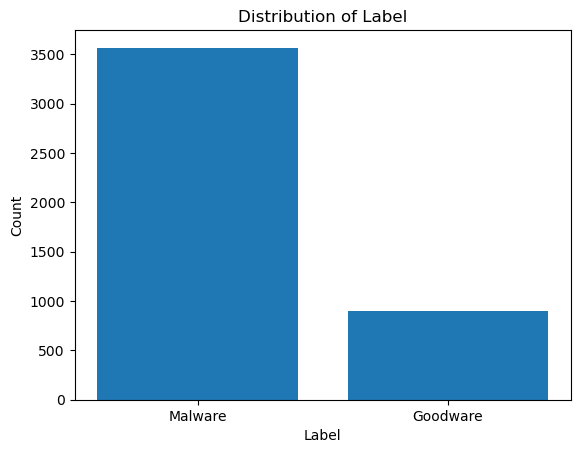

In [365]:
# Plot
plt.bar(target_distribution.index.astype(str), target_distribution.values)  # Ensure x-ticks are strings
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Label')
plt.xticks([0, 1], ['Malware', 'Goodware'])
plt.show()

The distribution shows that this is a highly imbalanced dataset with the minority class being goodware which only makes up only a small percentage of the total dataset. Therefore, we implement SMOTE to create artificial minority instances.

In [368]:
# separate the features and target 
X = malware.drop(columns=['Label'])  # Features
y = malware['Label']  # Target columns (goodware and malware)

# verify the shapes of X and y
print(X.shape)
print(y.shape)

(4464, 241)
(4464,)


In [374]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_resampled).value_counts())

Class distribution after SMOTE:
 Label
1    3565
0    3565
Name: count, dtype: int64


In [376]:
# Convert the resampled data back into a DataFrame
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Label')], axis=1)

### 2) Conduct exploratory data analysis (EDA) to uncover insights related to class distributions, feature correlations, and potential predictors of interest (Tip: consider applying PCA). Summarize key findings that could influence model selection and tuning.

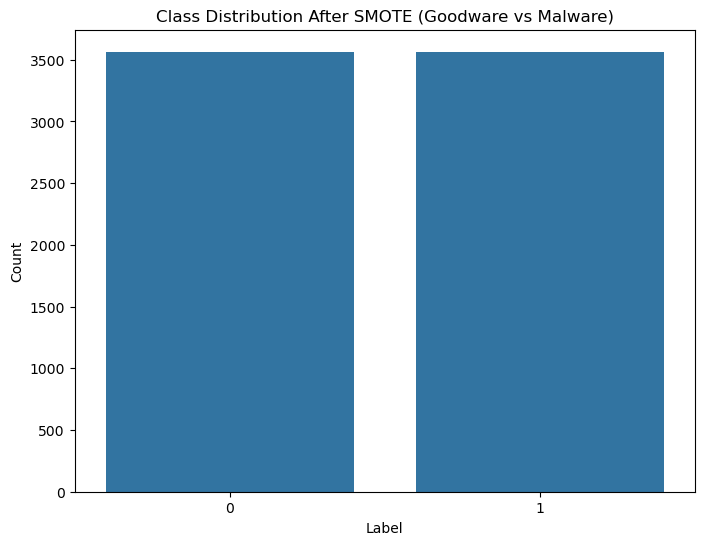

In [381]:
# Plot the distribution of the target classes after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE (Goodware vs Malware)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [383]:
# calculate correlations with the target columns (Label_goodware and Label_malware)
correlation_target = resampled_data.corrwith(resampled_data['Label'])

# Display the correlations
print("Correlation with Label:\n", correlation_target)

Correlation with Label:
 ACCESS_ALL_DOWNLOADS                                       -0.040366
ACCESS_CACHE_FILESYSTEM                                    -0.056351
ACCESS_CHECKIN_PROPERTIES                                   0.055634
ACCESS_COARSE_LOCATION                                     -0.266325
ACCESS_COARSE_UPDATES                                       0.066082
                                                              ...   
Landroid/telephony/TelephonyManager;->getSimOperatorName   -0.354905
Landroid/telephony/TelephonyManager;->getSimCountryIso     -0.219048
Landroid/telephony/TelephonyManager;->getSimSerialNumber   -0.084776
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    0.011590
Label                                                       1.000000
Length: 242, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [385]:
# Filter the correlation to show only the highest correlations
top_corr_target = correlation_target[correlation_target.abs() > 0.5]  


print("Top Correlations with Label:\n", top_corr_target)

Top Correlations with Label:
 GET_TASKS                                                         0.695903
KILL_BACKGROUND_PROCESSES                                         0.581292
RECEIVE_BOOT_COMPLETED                                            0.748138
Ljava/net/URL;->openConnection                                   -0.718016
Landroid/location/LocationManager;->getLastKgoodwarewnLocation   -0.604365
Label                                                             1.000000
dtype: float64


According to the top correlated features with goodware and malware, variables such as GET_TASKS, KILL_BACKGROUND_PROCESSES, and RECEIVE_BOOT_COMPLETED are highly correlated with malware wince applications might use these functions to spy on users, kill background processes to prevent security apps, or allow apps to launch when a device boots and reboots up. On the other hand, legitimate apps use functions like Ljava/net/URL;->openConnection and Landroid/location/LocationManager;->getLastKgoodwarewnLocation for common internet communication and fair use of location services for things like maps or ride-share.

#### Handle Perfect Multicollinearity

In [390]:
# Identify perfectly correlated features
corr_matrix = resampled_data.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with perfect correlation (correlation = 1)
perfect_corr = [column for column in upper_tri.columns if any(upper_tri[column] == 1)]
print("Dropping Features:", perfect_corr)

# Drop one of each pair of perfectly correlated features
resampled_data.drop(columns=perfect_corr, inplace=True)

Dropping Features: ['ACCESS_SURFACE_FLINGER', 'BIND_CARRIER_MESSAGING_SERVICE', 'BIND_DREAM_SERVICE', 'BIND_INPUT_METHOD', 'BIND_NFC_SERVICE', 'BIND_PRINT_SERVICE', 'BIND_REMOTEVIEWS', 'BIND_TEXT_SERVICE', 'BIND_TV_INPUT', 'BIND_VOICE_INTERACTION', 'BIND_VPN_SERVICE', 'BIND_WALLPAPER', 'BLUETOOTH_PRIVILEGED', 'BROADCAST_PACKAGE_REMOVED', 'BROADCAST_SMS', 'BROADCAST_WAP_PUSH', 'CAPTURE_AUDIO_OUTPUT', 'CAPTURE_SECURE_VIDEO_OUTPUT', 'CAPTURE_VIDEO_OUTPUT', 'CONTROL_LOCATION_UPDATES', 'FORCE_BACK', 'GET_TOP_ACTIVITY_INFO', 'GLOBAL_SEARCH', 'INJECT_EVENTS', 'INSTALL_SHORTCUT', 'INTERNAL_SYSTEM_WINDOW', 'LOCATION_HARDWARE', 'MANAGE_APP_TOKENS', 'MANAGE_DOCUMENTS', 'READ_FRAME_BUFFER', 'READ_HISTORY_BOOKMARKS', 'READ_INPUT_STATE', 'READ_VOICEMAIL', 'SEND_RESPOND_VIA_MESSAGE', 'SET_DEBUG_APP', 'SET_POINTER_SPEED', 'SET_PROCESS_LIMIT', 'SET_TIME', 'SET_TIME_ZONE', 'SIGNAL_PERSISTENT_PROCESSES', 'SUBSCRIBED_FEEDS_WRITE', 'TRANSMIT_IR', 'UNINSTALL_SHORTCUT', 'UPDATE_DEVICE_STATS', 'USE_SIP', 'WRI

In [392]:
# Export to csv
resampled_data.to_csv('data/preprocessed/malware_preprocessed_v2.csv', index=False)

#### PCA

In [395]:
# Separate features and targets
X_final = resampled_data.drop(columns=['Label'])  # Features
y_final = resampled_data['Label']  # Target labels

In [397]:
# Standardize the features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

In [403]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

In [405]:
# Convert PCA result to a dataframe for easy viewing
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

In [407]:
# Concatenate the PCA results with the target labels
final_pca_df = pd.concat([X_pca_df, y_final], axis=1)

In [409]:
# Display the first few rows of the PCA-transformed data
final_pca_df.head()

,PCA1,PCA2,Label
0,-0.321941,-1.074999,1
1,-1.109919,0.526184,1
2,-1.194217,0.633761,1
3,-0.911590,0.108953,1
4,-1.526129,1.478503,1


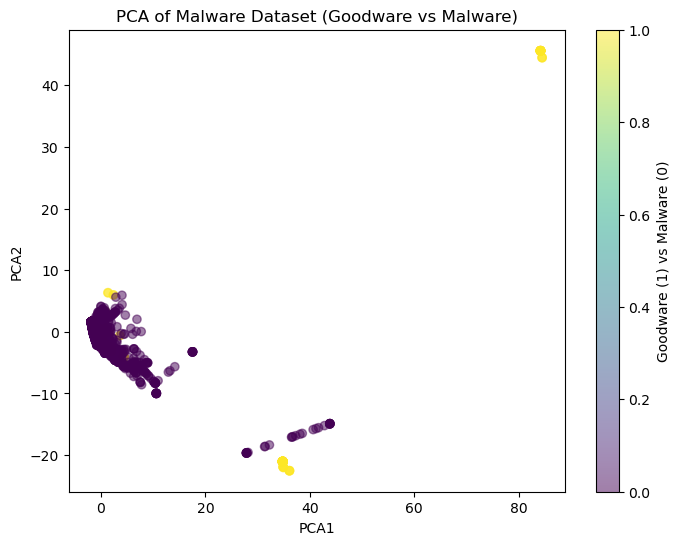

Explained variance by each component: [0.28392712 0.09635104]


In [411]:
plt.figure(figsize=(8, 6))
plt.scatter(final_pca_df['PCA1'], final_pca_df['PCA2'], c=final_pca_df['Label'], cmap='viridis', alpha=0.5)
plt.title('PCA of Malware Dataset (Goodware vs Malware)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Goodware (1) vs Malware (0)')
plt.show()

# Check the explained variance to understand how much variance is captured by the components
print(f"Explained variance by each component: {pca.explained_variance_ratio_}")

The PCA plot shows distinct clusters, suggesting that malware and goodware have some differences in their features. A few of the yellow goodware points are clearly separated from the more dense malware cluster, meaning PCA is capturing some distinguishing characteristics. There is, however, some overlap indicating that some of the goodware and malware samples have similar feature representations.

The first two components explain 28.39% (PCA 1) and 9.63% (PCA 2) of the total variance. Most of the dataset's variance is therefore not captured in just these two dimensions, but it is a good initial exploration in determining important features. Below we implement more components for further separation.

In [414]:
# Apply PCA with more components 
pca1 = PCA(n_components=5) 
X_pca1 = pca1.fit_transform(X_scaled)

In [416]:
# Convert PCA result to a dataframe for easy viewing
X_pca_df1 = pd.DataFrame(X_pca1, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])

In [418]:
# Concatenate the PCA results with the target labels once again
final_pca_df = pd.concat([X_pca_df1, y_final], axis=1)

In [420]:
# Display the first few rows of the PCA-transformed data (n=5)
final_pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,Label
0,-0.321941,-1.075000,-2.616770,-5.649343,4.922548,1
1,-1.109919,0.526185,0.824019,-0.135794,-0.455778,1
2,-1.194217,0.633761,0.797331,0.297544,0.950608,1
3,-0.911590,0.108954,-0.151365,-1.282159,-0.757221,1
4,-1.526129,1.478503,3.144332,2.108357,-0.049007,1


In [422]:
# Explained variance of each component
explained_variance = pca1.explained_variance_ratio_

# Print explained variance for each component
print("Explained Variance Ratio by Component:")
for i, var in enumerate(explained_variance):
    print(f"PCA {i+1}: {var:.4f}")

Explained Variance Ratio by Component:
PCA 1: 0.2839
PCA 2: 0.0964
PCA 3: 0.0698
PCA 4: 0.0467
PCA 5: 0.0376


In [424]:
# Create a DataFrame of feature contributions (loadings)
pca_loadings = pd.DataFrame(pca1.components_.T, 
                            columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'], 
                            index=X_final.columns)

# Sort by absolute contribution to PCA1
top_features = pca_loadings['PCA1'].abs().sort_values(ascending=False)

# Display the top 10 contributing features
print(top_features.head(10))

READ_SOCIAL_STREAM                0.136755
SUBSCRIBED_FEEDS_READ             0.136043
PERSISTENT_ACTIVITY               0.134891
ACCESS_LOCATION_EXTRA_COMMANDS    0.133934
WRITE_USER_DICTIONARY             0.132856
WRITE_PROFILE                     0.132346
READ_SYNC_STATS                   0.132342
REORDER_TASKS                     0.128696
READ_USER_DICTIONARY              0.128452
EXPAND_STATUS_BAR                 0.127376
Name: PCA1, dtype: float64


PCA1 explains the most variance and reveals that many features relate to reading user social data, system access, location commands, and user dictionary modifications. READ_SOCIAL_STREAM and SUBSCRIBED_FEEDS_READ have the highest weights in PCA1. Some other significant features include PERSISTENT_ACTIVITY, ACCESS_LOCATION_EXTRA_COMMANDS, and WRITE_USER_DICTIONARY which are indicative of apps that require extensive background activity or personalization features. Apps with high values in PCA1 are likely to request more instrusive or sensitive permissions. These features, therefore, make sense as strong predictors of malware/goodware classification.

### 3) Outline and justify a strategy for splitting the dataset into training, validation, and test sets, considering any potential class imbalance and the dataset’s characteristics

After implemeting SMOTE, it is important to maintain the balance between model performance and ensuring that it is generalizable on unseen data. The inital split is a majority (70%) used for training, allowing the model to learn from a substantial portion of the data while incorporating artificial samples from SMOTE for the minority class. The remaining 30% of the dataset will be reserved for the test set. We implement a stratified split on the dataset where each class is equally represented in both training and test sets. One key issue is that SMOTE can artifically inflate model performance on the test set, distorting our model's generalizability.

## Task B: Classification Techniques & Analysis

### Model Selection

The goal of this classification task is predicting instances of malware. The dataset is imbalanced, meaning there are more positive cases (malware) compared to negative cases. This imbalance can cause challenges with traditional accuracy metrics, which tend to favor the majority class. We aim to prioritize the minimization of false negatives while also preserving as many benign apps as possible. We will use the 3 models below:

1) CART: CART is a decision tree that uses the Gini index as criterion for splitting. It builds binary trees, meaning each node is split into two child nodes. It includes mechanisms for handling missing values and provides built-in pruning methods to avoid overfitting. It can handle non-linear relationships and interactions between features, making it suitable for capturing complex patterns. It is fairly easy to interpret and visualize.

2) Random Forest: Creates multiple decision trees on random subsets, ensuring that each subset is balanced to include representation of the minority class. Reduces overfitting compared to a single decision tree. It also is able to capture very complex relationships. Works well with small to medium datasets like ours. Much longer training time.

### Evaluation Metrics

The goal of our algorithm is to capture as many malware cases (minimizing false negatives), while preserving as many benign apps as possible. False negatives (missed instances of malware) are more harmful than false positives (falsely flagging benign apps as malware), however, given the imbalance of the dataset we want to prioritize both precision and recall. Thus, we will use F score as our scoring metric. The F score is a weighted balance of precision and recall. We will use a B>1 since we want to prioritize recall. This will allow us to ensure that the model is capturing as many instances of malware as possible without incorrectly flagging benign apps.

In [439]:
f2_scorer = make_scorer(fbeta_score, beta=2)

### Split Data

Given that the dataset is imbalanced (with fewer benign samples than malicious ones), stratification prevents the training set from being skewed toward the majority class. Without stratification, the model might underrepresent the minority class (benign apps) in the training set, leading to poor performance in preserving benign apps.

The training set will have a balanced representation of both classes and the validation set will accurately reflect the overall class distribution, allowing for better hyperparameter tuning. The test set will also reflect the real-world distribution, making performance evaluation more realistic. Since our goal is to maximize recall (minimize false negatives), maintaining class balance during training and validation is critical.

We will also implement K-Fold cross validation since we have a relatively small dataset (n=4464), with stratification.

In [445]:
# split data
X = resampled_data.drop('Label', axis=1)
y = resampled_data['Label']

# split using stratification 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=7)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=7)


In [447]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test sets using the same scaler (without fitting again)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [455]:
# implement K-Fold cross-validation since we have a relatively small dataset
skf = StratifiedKFold(n_splits=5)

### Models

#### Model 1: CART (Decision Tree)

CART is a simple, interpretable algorithm that can handle imbalanced data. It splits data based on the Gini index, making it effective for classification tasks.

In [462]:
cart_model = DecisionTreeClassifier(random_state =7)
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 5], 
    'class_weight': ['balanced', None],
    'max_features': ['sqrt', None], 
    'ccp_alpha': [0.01, 0.05, 0.1] # Add feature limitation
}

grid_search_cart = GridSearchCV(cart_model, param_grid, scoring=f2_scorer, cv=skf)
grid_search_cart.fit(X_train_scaled, y_train)

# Use the validation set for hyperparameter tuning
best_cart_model = grid_search_cart.best_estimator_
print(f"Best Hyperparameters: {grid_search_cart.best_params_}")

# Evaluate the best model using cross-validation on the training data
cross_val_scores = cross_val_score(best_cart_model, X_train_scaled, y_train, cv=skf, scoring=f2_scorer)
print(f"Cross-validation ROC AUC scores (TRAINING): {cross_val_scores}")
print(f"Mean ROC AUC (TRAINING): {cross_val_scores.mean():.3f}")

# Evaluate the best model on the validation set
val_preds = best_cart_model.predict(X_val_scaled)
print("Validation Classification Report:\n", classification_report(y_val, val_preds))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, val_preds))

# Calculate and print recall on the validation set
val_recall = recall_score(y_val, val_preds)
print(f"Validation Recall: {val_recall:.3f}")
print(f"Validation F2: {fbeta_score(y_val, best_cart_model.predict_proba(X_val_scaled)[:, 1] > 0.5, beta=2)}")

Best Hyperparameters: {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Cross-validation ROC AUC scores (TRAINING): [0.93787818 0.95276544 0.982      0.94698503 0.9450727 ]
Mean ROC AUC (TRAINING): 0.953
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       534
           1       0.99      0.94      0.96       535

    accuracy                           0.97      1069
   macro avg       0.97      0.97      0.97      1069
weighted avg       0.97      0.97      0.97      1069

Validation Confusion Matrix:
 [[529   5]
 [ 32 503]]
Validation Recall: 0.940
Validation F2: 0.949773413897281


In [464]:
# Evaluate CART

best_cart_model.fit(X_train_scaled, y_train)

cart_preds = best_cart_model.predict(X_test_scaled)
print("CART Classification Report:\n", classification_report(y_test, cart_preds))
print("CART Confusion Matrix:\n", confusion_matrix(y_test, cart_preds))

# Calculate and print recall
cart_recall = recall_score(y_test, cart_preds)
print(f"CART Recall: {cart_recall:.3f}")

CART Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       535
           1       0.99      0.95      0.97       535

    accuracy                           0.97      1070
   macro avg       0.97      0.97      0.97      1070
weighted avg       0.97      0.97      0.97      1070

CART Confusion Matrix:
 [[529   6]
 [ 25 510]]
CART Recall: 0.953


In [466]:
# Prune the tree using the cost-complexity pruning path
path = best_cart_model.cost_complexity_pruning_path(X_train_scaled, y_train)
ccp_alphas = path.ccp_alphas  # Values of alpha for pruning

# Test different pruning strategies (find optimal alpha)
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha=alpha)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    print(f"Alpha: {alpha}, Accuracy: {accuracy_score(y_test, preds)}")

Alpha: 0.0, Accuracy: 0.991588785046729
Alpha: 0.00022677625718320023, Accuracy: 0.991588785046729
Alpha: 0.0003903131947358427, Accuracy: 0.991588785046729
Alpha: 0.0003963250737882354, Accuracy: 0.991588785046729
Alpha: 0.000766457052275841, Accuracy: 0.983177570093458
Alpha: 0.0007854028428343915, Accuracy: 0.983177570093458
Alpha: 0.0007916238073734415, Accuracy: 0.983177570093458
Alpha: 0.0007998011615413549, Accuracy: 0.983177570093458
Alpha: 0.0008991373394756871, Accuracy: 0.983177570093458
Alpha: 0.0010200735910232822, Accuracy: 0.9803738317757009
Alpha: 0.0013526715520567607, Accuracy: 0.9775700934579439
Alpha: 0.001517721482125492, Accuracy: 0.9775700934579439
Alpha: 0.003493407223547681, Accuracy: 0.9785046728971962
Alpha: 0.00548815553392266, Accuracy: 0.974766355140187
Alpha: 0.005819697880565276, Accuracy: 0.9728971962616823
Alpha: 0.009867787506287782, Accuracy: 0.9710280373831776
Alpha: 0.13178244174851497, Accuracy: 0.9710280373831776
Alpha: 0.2977366543980442, Accura

#### Model 2: Random Forest

Random forest creates multiple decision trees on random subsets, ensuring that each subset is balanced to include representation of the minority class. Random forest reduces overfitting compared to a single decision tree. It also is able to capture very complex relationships. Works well with small to medium datasets like ours.

In [471]:
# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state = 7)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [3, 5, 7],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [2, 4], 
    'class_weight': ['balanced', None],
    'max_features': ['sqrt', 'log2'], 
    'max_leaf_nodes': [10]
}

# Perform Grid Search with cross-validation
grid_search_rf = GridSearchCV(rf_model, param_grid, scoring=f2_scorer, cv=skf)
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best Random Forest model from the grid search
best_rf_model = grid_search_rf.best_estimator_
print(f"Best Hyperparameters: {grid_search_rf.best_params_}")

# Evaluate the best model using cross-validation on the training data
cross_val_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=skf, scoring=f2_scorer)
print(f"Cross-validation ROC AUC scores (TRAINING): {cross_val_scores}")
print(f"Mean ROC AUC (TRAINING): {cross_val_scores.mean():.3f}")

# Evaluate the best model on the validation set
val_preds = best_rf_model.predict(X_val_scaled)
print("Validation Classification Report:\n", classification_report(y_val, val_preds))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, val_preds))

# Calculate and print recall on the validation set
val_recall = recall_score(y_val, val_preds)
print(f"Validation Recall: {val_recall:.3f}")
print(f"Validation F2: {fbeta_score(y_val, best_rf_model.predict_proba(X_val_scaled)[:, 1] > 0.5, beta=2)}")

Best Hyperparameters: {'class_weight': None, 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Cross-validation ROC AUC scores (TRAINING): [0.97311396 0.98078463 0.98876855 0.97222222 0.98074609]
Mean ROC AUC (TRAINING): 0.979
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       534
           1       1.00      0.97      0.98       535

    accuracy                           0.99      1069
   macro avg       0.99      0.99      0.99      1069
weighted avg       0.99      0.99      0.99      1069

Validation Confusion Matrix:
 [[532   2]
 [ 14 521]]
Validation Recall: 0.974
Validation F2: 0.978220052572287


In [473]:
# Evaluate Random Forest

best_rf_model.fit(X_train_scaled, y_train)

rf_preds = best_rf_model.predict(X_test_scaled)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

# Calculate and print recall
rf_recall = recall_score(y_test, rf_preds)
print(f"Random Forest Recall: {rf_recall:.3f}")

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       535
           1       0.99      0.98      0.98       535

    accuracy                           0.99      1070
   macro avg       0.99      0.99      0.99      1070
weighted avg       0.99      0.99      0.99      1070

Random Forest Confusion Matrix:
 [[530   5]
 [ 11 524]]
Random Forest Recall: 0.979


### Model Interpretability

I used SHAP (SHapley Additive exPlanations) for model interpretability because it provides clear and consistent explanations for the predictions made by complex machine learning models.

SHAP calculates the contribution of each feature to the prediction (positive or negative). If a feature significantly increases the likelihood of an app being classified as malicious, it will have a strong positive SHAP value.

Plots:

- Force Plot: This visualizes how much each feature pushes the model's output toward predicting either "benign" or "malicious."
- Summary Plot: It shows the average impact of each feature across all predictions, helping identify the most influential predictors in the model.
This approach ensures that security analysts can understand which app characteristics are most indicative of malware, helping improve threat detection and prevention strategies.

**Decision Tree**

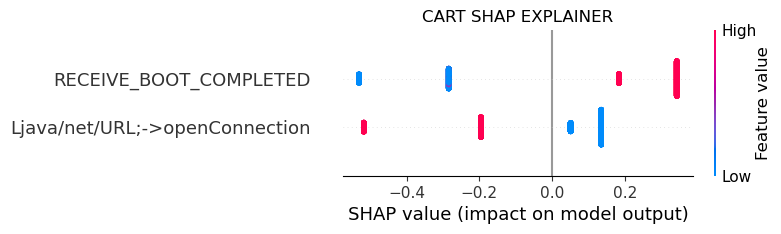

In [491]:
# Create SHAP explainer for the CART model
explainer = shap.TreeExplainer(best_cart_model)

# Calculate SHAP values for the training set
shap_values = explainer.shap_values(X_train_scaled)

# Extract SHAP values for the positive class (malware = 1)
shap_values_positive_class = shap_values[:, :, 1]

# SHAP summary plot for the positive class (malware detection)
fig = plt.figure(figsize=(10, 6))  # Optional: adjust the figure size
shap.summary_plot(shap_values_positive_class, X_train, max_display=2, show=False)

# Add a title to the plot
plt.title("CART SHAP EXPLAINER")

# Save the plot as a figure
plt.savefig("figures/cart_shap_explainer.png", bbox_inches='tight')  # Saves as PNG file
plt.show()

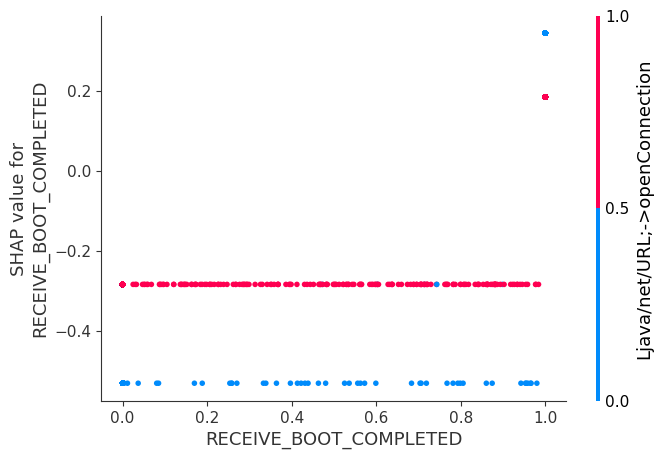

In [493]:
# SHAP dependence plot for a specific feature (e.g., 'feature_name')
shap.dependence_plot('RECEIVE_BOOT_COMPLETED', shap_values_positive_class, X_train)

# SHAP force plot for a specific instance (e.g., the first instance in the dataset)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_positive_class[0], X_train.iloc[0])

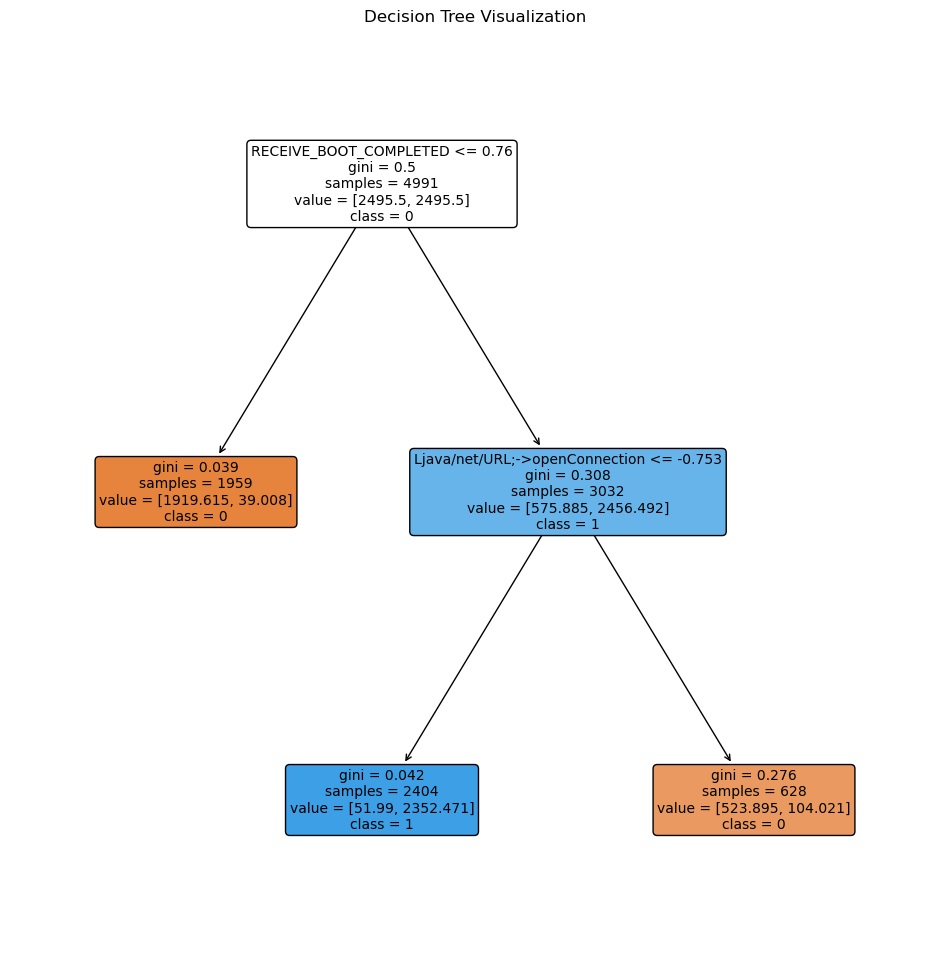

In [501]:
# Visualize the tree using sklearn
plt.figure(figsize=(12, 12))
plot_tree(
    best_cart_model, 
    feature_names=X_train.columns,        # Set feature names
    class_names=[str(cls) for cls in sorted(set(y_train))],  # Ensure class names are strings and sorted
    filled=True,                           # Color the nodes based on class
    rounded=True,                          # Rounded corners for the nodes
    fontsize=10,                           # Font size for labels
    max_depth=5                           # Limit tree depth for better visualization (you can adjust this)
)
plt.title("Decision Tree Visualization")
plt.savefig("figures/decision_tree.png")
plt.show()

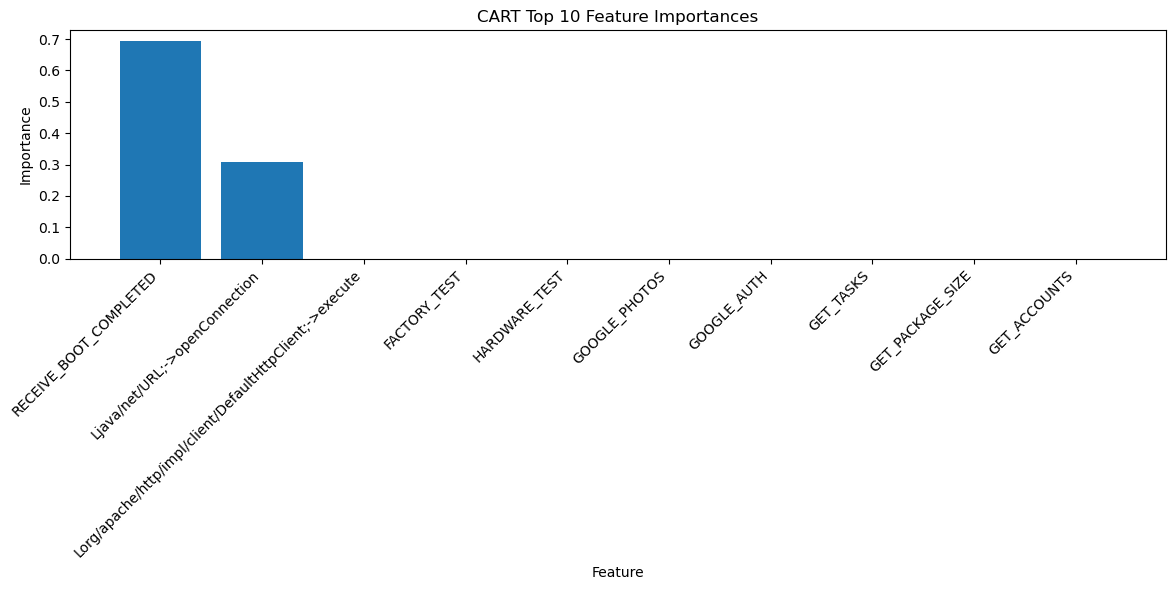

In [503]:
# Get the feature importances and sort them in descending order
importances = best_cart_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort the indices of features by importance

# Get the top 10 most important features
top_n = 10
top_indices = indices[:top_n]

# Plot the top 10 most important features
plt.figure(figsize=(12, 6))
plt.bar(X_train.columns[top_indices], importances[top_indices])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f'CART Top {top_n} Feature Importances')
plt.xticks(rotation=45, ha="right")  # Rotate the feature names for better visibility
plt.tight_layout()
plt.savefig("figures/cart_feature_importances.png")
plt.show()

**Random Forest**

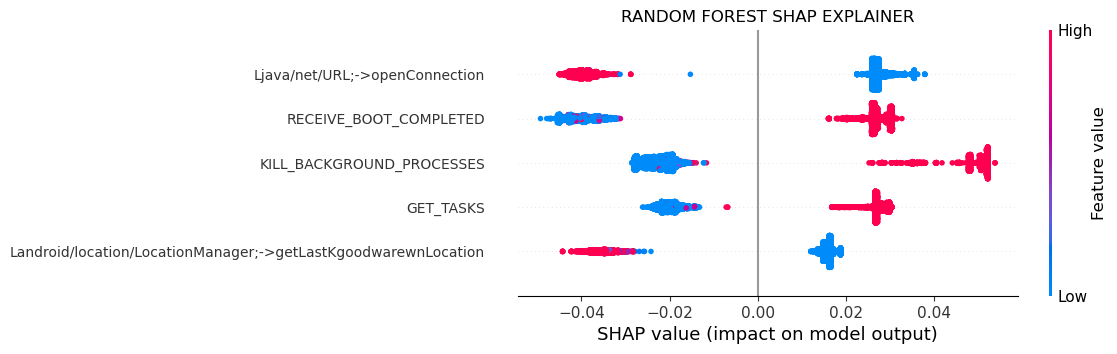

In [508]:
# Create SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(best_rf_model)

# Calculate SHAP values for the training set
shap_values = explainer.shap_values(X_train_scaled)

# Extract SHAP values for the positive class (malware = 1)
shap_values_positive_class = shap_values[:, :, 1]

# SHAP summary plot for the positive class (malware detection)
fig = plt.figure(figsize=(15, 6))  # Optional: adjust the figure size
shap.summary_plot(shap_values_positive_class, X_train, max_display=5, show=False)

# Rotate the feature names on the y-axis for better visibility
plt.yticks(rotation=0, fontsize=10)  # You can adjust fontsize to make names more readable

# Adjust the spacing between the labels
plt.subplots_adjust(left=0.2)  # This gives more space on the left side for the labels


# Add a title to the plot
plt.title("RANDOM FOREST SHAP EXPLAINER")

# Save the plot as a figure
plt.savefig("figures/rf_shap_explainer.png", bbox_inches='tight')  # Saves as PNG file
plt.show()


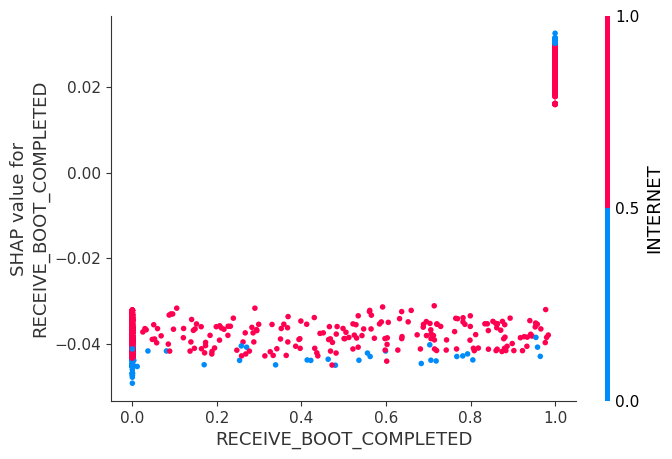

In [510]:
# SHAP dependence plot for a specific feature (e.g., 'feature_name')
shap.dependence_plot('RECEIVE_BOOT_COMPLETED', shap_values_positive_class, X_train)

# SHAP force plot for a specific instance (e.g., the first instance in the dataset)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_positive_class[0], X_train.iloc[0])

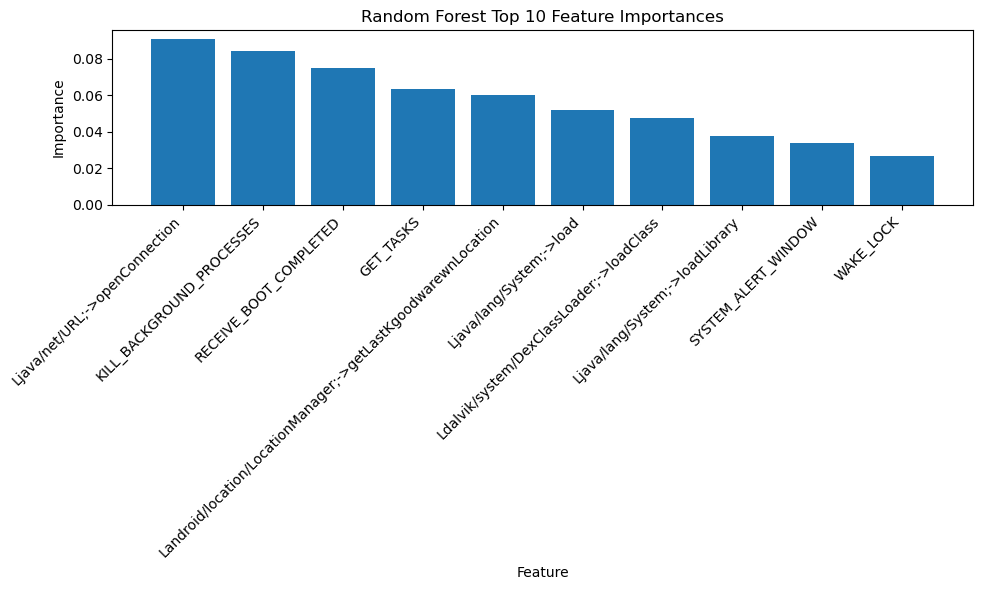

In [512]:
# Get the feature importances and sort them in descending order - Random Forest
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort the indices of features by importance

# Get the top 10 most important features
top_n = 10
top_indices = indices[:top_n]

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns[top_indices], importances[top_indices])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f'Random Forest Top {top_n} Feature Importances')
plt.xticks(rotation=45, ha="right")  # Rotate the feature names for better visibility
plt.tight_layout()
plt.savefig("figures/rf_feature_importances.png")
plt.show()

### Comments on the Model Interpretability Process

#### Interpretability and Its Role in Understanding the Model’s Decision-Making Process

Interpretability plays a crucial role in understanding how a machine learning model arrives at its predictions, especially in domains like cybersecurity, where decisions can have serious real-world implications. In this case, using SHAP (Shapley Additive Explanations) for both the CART decision tree and the random forest provides valuable insights into the model's behavior, feature importance, and how each feature contributes to the final decision (e.g., detecting malware). Here’s a detailed look at how interpretability aids in understanding the decision-making process:

**CART (Decision Tree)** The CART model is highly interpretable, and its decision process is transparent, which makes it easy to visualize how certain features drive the prediction.

- Key Findings:
The model relies heavily on just two features: 'RECEIVE_BOOT_COMPLETED' and 'Ljava/net/URL;->openConnection'. The tree structure is simple, with only two decision nodes, making it easy to trace the decision logic and understand how the model makes its predictions. The SHAP analysis reinforces the decision-making process by showing the influence of these two features on the model’s output. Specifically: RECEIVE_BOOT_COMPLETED: Low values of this feature have a strong negative influence on the likelihood of the input being classified as malware, while higher values increase the likelihood of a malware classification. Ljava/net/URL;->openConnection: This feature has the reverse relationship, with lower values decreasing the likelihood of malware, and higher values indicating a stronger likelihood. The SHAP plots clearly show how these features impact the prediction, with sharp vertical lines indicating distinct points of influence for each feature, making the decision process straightforward to explain. For example, if the feature 'RECEIVE_BOOT_COMPLETED' is high, it indicates a higher likelihood of malware, which is easy to communicate to stakeholders.

- Implications: This transparency is particularly valuable in environments where understanding model decisions is critical, such as security operations or incident response. The simplicity of the CART model allows security analysts to quickly grasp which features are most important in detecting malware, making it easier to trust and act on the model’s output. However, while interpretability is a strength, the model may oversimplify more complex patterns, which is why additional techniques like ensemble methods (e.g., random forest) can be more effective in capturing intricate relationships.

**Random Forest**

While the random forest model is more complex and less interpretable than a single decision tree, SHAP provides a means to gain insights into the decision process by quantifying feature importance and explaining how each feature contributes to the final prediction.

- Key Findings: In contrast to the simple CART model, the random forest uses a wider array of features. The most important features include 'Ljava/net/URL;->openConnection', 'KILL_BACKGROUND_PROCESSES', 'RECEIVE_BOOT_COMPLETED', 'GET_TASKS', and several others. The feature importance is more evenly distributed across these variables, with a slight decrease in importance as more features are considered.

The SHAP plot shows much more horizontal variation, which reflects the more nuanced contributions of each feature. This horizontal spread indicates the complex interactions between features and their varying levels of influence across different samples. The color-coded SHAP values clearly differentiate the high and low values for the top features, helping us understand which features drive the prediction towards malware detection and to what extent. For example:

'KILL_BACKGROUND_PROCESSES' and 'GET_TASKS' are associated with higher SHAP values for malware classifications, suggesting that certain behaviors commonly found in malware applications (e.g., background task manipulation) are strong indicators of malicious activity. Similarly, the SHAP plots for 'RECEIVE_BOOT_COMPLETED' and 'Ljava/net/URL;->openConnection' show their respective roles in increasing or decreasing the likelihood of a malware classification, much like in the CART model, but with more variation due to the ensemble nature of the random forest.

- Implications: The random forest model, while more accurate, is harder to interpret directly. However, SHAP helps clarify which features are most influential in making predictions. This is particularly useful in real-world applications like malware detection, where different behavior patterns or system calls (e.g., 'KILL_BACKGROUND_PROCESSES') may suggest malicious activity. By using SHAP, security experts can identify the key behaviors or anomalies that lead to malware classification, which is crucial for understanding the model’s predictions and taking appropriate actions.

**Real-World Implications** The ability to interpret the decision-making process of both models has important implications for the real-world problem of malware detection:

- Model Transparency: The CART decision tree offers clear and simple insights, which is beneficial in real-world scenarios where transparency is needed. Security teams can easily explain why a particular application was flagged as malware based on specific behaviors (like receiving a boot event or opening a URL connection), helping in real-time decision-making and justification of actions.

- Handling Complex Data: The random forest model, with its more complex decision-making process, is better equipped to handle intricate and noisy data. It can detect more subtle patterns, such as unusual background processes or system calls, which might be indicative of malware. The SHAP analysis helps deconstruct these complex interactions, providing a clearer understanding of the behavior that leads to malware classification.

- Security Response: The interpretability of the models ensures that security teams can trust the predictions, diagnose potential false positives or negatives, and make informed decisions about which applications or system behaviors require closer inspection or remediation. The CART model may be more useful for quick, rule-based decisions, while the random forest model is more suited for comprehensive detection in diverse and evolving environments.

In summary, both models' interpretability via SHAP is instrumental in understanding how they make decisions and allows for practical, informed action in real-world security problems. The decision tree’s simplicity aids in transparency, while the random forest’s ability to capture complex interactions is enhanced by SHAP’s explanation of feature influence.

### Results and Conclusions

In [524]:
# Calculate F2 score for each model using predict_proba and thresholding at 0.5
cart_f2 = fbeta_score(y_test, best_cart_model.predict_proba(X_test_scaled)[:, 1] > 0.5, beta=2)
rf_f2 = fbeta_score(y_test, best_rf_model.predict_proba(X_test_scaled)[:, 1] > 0.5, beta=2)

# Print the results
print(f"CART F-METRIC: {cart_f2:.3f}")
print(f"Random Forest F-METRIC: {rf_f2:.3f}")

CART F-METRIC: 0.960
Random Forest F-METRIC: 0.982


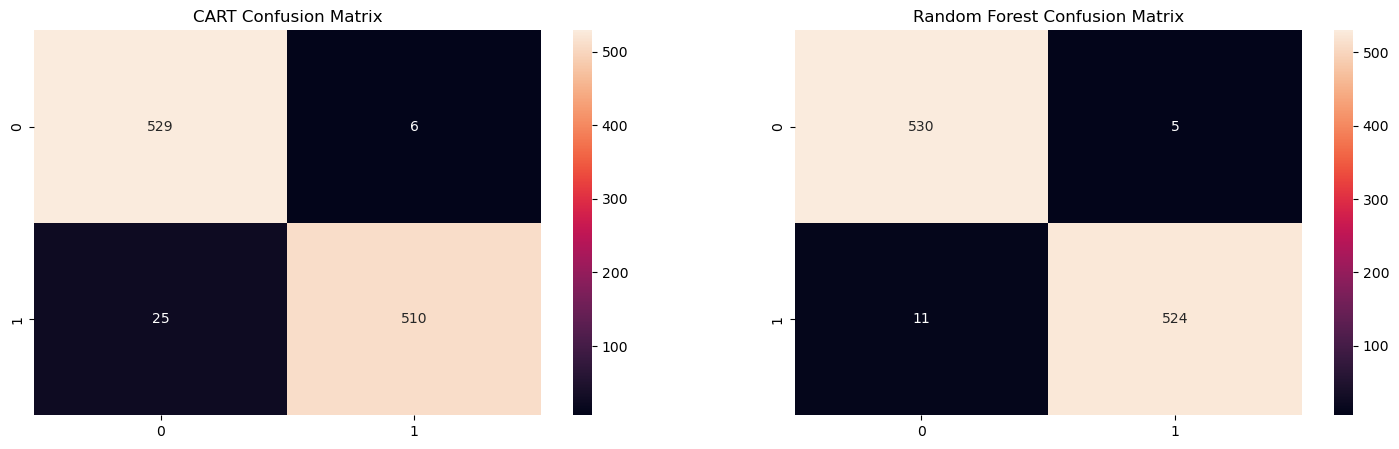

In [526]:
# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.heatmap(confusion_matrix(y_test, cart_preds), annot=True, fmt='d', ax=axes[0])
axes[0].set_title('CART Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
fig.savefig("figures/classification2_confusion_matrices.png")

#### Model Selection and Explanation
Both the simple decision tree (CART) and the more complex random forest have their respective advantages and drawbacks, depending on the context.

**CART (Decision Tree)**
- Interpretability: CART models are relatively easy to interpret and visualize. This is a key strength, as you can directly observe how features split the data to make decisions, which is valuable for understanding the decision-making process.

- Performance: The decision tree performed well in terms of recall and F2 score (especially with its validation recall of 0.94 and F2 score of 0.95), but it's slightly more prone to overfitting, especially on small datasets. It still achieved a decent classification performance, with the recall being 0.95 on the test set.

- Limitations: The model might miss complex patterns or relationships that could be captured by more powerful models like random forests. While the decision tree model is highly interpretable, it could be too simple for complex decision boundaries, especially in the presence of noise or non-linear relationships.

**Random Forest**
- Interpretability: Random forests are harder to interpret directly because they involve multiple decision trees, but techniques like SHAP can be used to explain the model. These models are more opaque but can provide more accurate results due to their ensemble nature.

- Performance: Random forest performed better than the decision tree, with higher recall (0.97 on validation and 0.98 on the test set) and a higher F2 score (0.978). This makes it a better choice when the goal is to minimize false negatives (i.e., better capture malware) while maintaining high precision.

- Advantages: It reduces overfitting by averaging across multiple trees, thus capturing more complex patterns without fitting too closely to noise. Random forests are also more robust when it comes to handling different types of features and noisy data.

- Limitations: Random forests are computationally more expensive to train and require more memory, especially as the number of trees and features increases.

**Which Model is Better?**

- For Predictive Power: The random forest is likely the better choice to maximize recall and minimize false negatives. It provides slightly better performance in terms of both recall and F2 score, without overfitting.

- For Interpretability: If we want to understand how the model works and need a clear, interpretable decision-making process, CART is a good option. However, for more complex patterns, random forests may be able to generalize better.

Ultimately, we have chosen the decision tree as our recommended model. It is much less computationally expensive, simpler to understand, while still achieving high results. In the future, it could be possible to experiment with including a few more features to slightly improve performance while still maintaining simplicity and generalizability.



#### Overall Findings & Discussion
Challenges Encountered and Steps Taken to Overcome Them

**Overfitting with the Decision Tree:**

Challenge: The decision tree model exhibited signs of overfitting, especially on small datasets. This occurred because the model was too complex and learned patterns that were specific to the training data, rather than generalizable. Solution: We employed techniques like pruning and tuning the hyperparameters (such as max depth, min samples split) to control the model’s complexity and reduce overfitting. This allowed us to improve its generalization to unseen data.

**Handling Noisy Data and Non-linear Relationships:**

Challenge: The decision tree struggled to capture complex, non-linear relationships in the data. Solution: Although the random forest was able to handle this challenge well by combining multiple decision trees, for the decision tree, we explored feature engineering and transformation techniques, such as polynomial features or feature scaling, to improve its performance.

**Computational Expense with Random Forest:**

Challenge: The random forest model, while superior in performance, was computationally more expensive to train and required more memory, especially as the number of trees and features increased. Solution: To address this, we performed hyperparameter tuning to reduce the number of trees and limited the depth of each tree, balancing model performance and computational cost. In a real-world scenario, distributed computing or cloud-based solutions might be considered to handle larger datasets.

**Model Interpretability:**

Challenge: Random forests are inherently harder to interpret because they involve many decision trees. Solution: We used SHAP (Shapley Additive Explanations) values to interpret the random forest model and understand the contribution of each feature to the predictions, which helped in gaining insights into the model’s decision-making process.

#### Readiness for Deployment
Both models are technically ready for deployment, but the decision tree is the preferred choice due to its simplicity, lower computational cost, and reasonable performance. The model has been adequately tuned to handle overfitting and noise, and its interpretability ensures that stakeholders can understand and trust the decisions made by the model.

However, before deployment, further validation on unseen real-world data would be essential to confirm the model's robustness and generalizability. Additionally, regular monitoring after deployment will be necessary to ensure that the model maintains its performance over time, especially if the data distribution changes or new patterns emerge.

In the future, the random forest model could be revisited if performance improvements are needed, but its increased computational cost would need to be carefully evaluated against the benefits in predictive accuracy.